In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_data=pd.read_csv("/content/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_patients=diabetes_data[diabetes_data['Outcome']==1]

In [6]:
diabetes_patients

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [7]:
diabetes_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   268 non-null    int64  
 2   BloodPressure             268 non-null    int64  
 3   SkinThickness             268 non-null    int64  
 4   Insulin                   268 non-null    int64  
 5   BMI                       268 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
 8   Outcome                   268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB


In [8]:
diabetes_patients['Age'].describe()

,Age
count,268.000000
mean,37.067164
std,10.968254
min,21.000000
25%,28.000000
50%,36.000000
75%,44.000000
max,70.000000


In [27]:
bins = range(20, 71, 10)
labels = ['21-30', '31-40', '41-50', '51-60', '61-70']

diabetes_patients['Age Group'] = pd.cut(diabetes_patients['Age'], bins=bins, labels=labels, include_lowest=True)

age_group_counts = diabetes_patients.groupby('Age Group')['Age'].count()

age_group_counts.rename({'Age':'Count'}, inplace=True)
print(age_group_counts)

Age Group
21-30    90
31-40    76
41-50    64
51-60    31
61-70     7
Name: Age, dtype: int64


<ipython-input-27-d90605a2af06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_patients['Age Group'] = pd.cut(diabetes_patients['Age'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-27-d90605a2af06>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = diabetes_patients.groupby('Age Group')['Age'].count()


In [29]:
heart_data=pd.read_csv("/content/heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [33]:
heart_patients=heart_data[heart_data['target']==1]
heart_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [34]:
heart_patients.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,1.0
std,9.631804,0.495498,0.945881,16.112188,53.010345,0.342029,0.502109,19.096928,0.342029,0.771079,0.590295,0.871462,0.468949,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [35]:
heart_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 5 to 1023
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       526 non-null    int64  
 1   sex       526 non-null    int64  
 2   cp        526 non-null    int64  
 3   trestbps  526 non-null    int64  
 4   chol      526 non-null    int64  
 5   fbs       526 non-null    int64  
 6   restecg   526 non-null    int64  
 7   thalach   526 non-null    int64  
 8   exang     526 non-null    int64  
 9   oldpeak   526 non-null    float64
 10  slope     526 non-null    int64  
 11  ca        526 non-null    int64  
 12  thal      526 non-null    int64  
 13  target    526 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 61.6 KB


In [36]:
bins = range(20, 81, 10)
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

heart_patients['Age Group'] = pd.cut(heart_patients['age'], bins=bins, labels=labels, include_lowest=True)

age_group_counts = heart_patients.groupby('Age Group')['age'].count()

age_group_counts.rename({'Age':'Count'}, inplace=True)
print(age_group_counts)

Age Group
21-30      4
31-40     41
41-50    166
51-60    204
61-70     94
71-80     17
Name: age, dtype: int64


<ipython-input-36-dd56c9eea885>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_patients['Age Group'] = pd.cut(heart_patients['age'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-36-dd56c9eea885>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = heart_patients.groupby('Age Group')['age'].count()


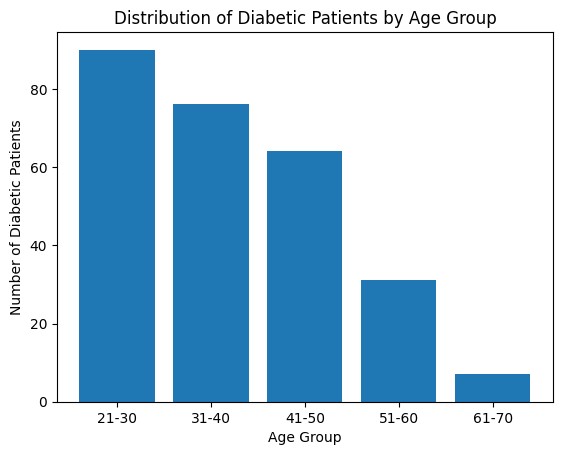

In [28]:
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetic Patients')
plt.title('Distribution of Diabetic Patients by Age Group')
plt.show()

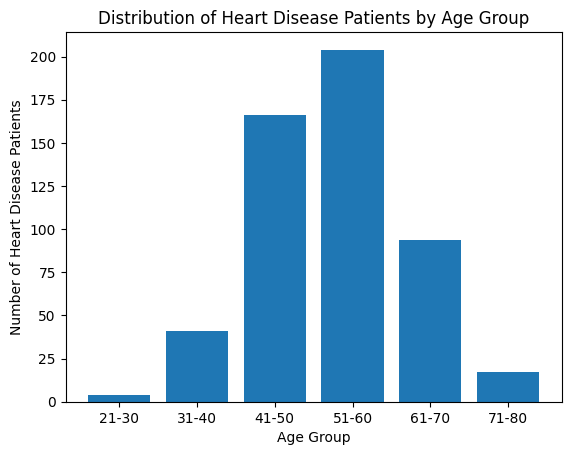

In [37]:
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Heart Disease Patients')
plt.title('Distribution of Heart Disease Patients by Age Group')
plt.show()

The distribution for diabetic patients and heart disease patients signifies the age group which are more prone for these diseases, as shown in the above graphs.